In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

# 1) prediction for  Primary Fuel

In [2]:
data=pd.read_csv(r'C:\Users\satyam\Desktop\phase-2 data\data-2\raw.githubusercontent.com_wri_global-power-plant-database_master_source_databases_csv_database_IND.csv')
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
list(data.columns)

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019',
 'generation_data_source',
 'estimated_generation_gwh']

In [4]:
data.drop(columns=['country_long','country','name','gppd_idnr','url'],axis=1,inplace=True)
data

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,CDM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [6]:
data.shape

(907, 22)

In [7]:
data.isnull().sum()

capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   capacity_mw               907 non-null    float64
 1   latitude                  861 non-null    float64
 2   longitude                 861 non-null    float64
 3   primary_fuel              907 non-null    object 
 4   other_fuel1               198 non-null    object 
 5   other_fuel2               1 non-null      object 
 6   other_fuel3               0 non-null      float64
 7   commissioning_year        527 non-null    float64
 8   owner                     342 non-null    object 
 9   source                    907 non-null    object 
 10  geolocation_source        888 non-null    object 
 11  wepp_id                   0 non-null      float64
 12  year_of_capacity_data     519 non-null    float64
 13  generation_gwh_2013       0 non-null      float64
 14  generation

In [9]:
#droping value which has all rows nan value
data.drop(columns=['other_fuel1','wepp_id','other_fuel3','other_fuel2','estimated_generation_gwh','generation_gwh_2013','generation_gwh_2019'],axis=1,inplace=True)
data

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,NaN,Central Electricity Authority,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# filling all nan values
data['latitude']=data['latitude'].fillna(data['latitude'].mean())     # continious data so we select mean
data['longitude']=data['longitude'].fillna(data['longitude'].mean())

In [11]:
data['total_generation'] =data['generation_gwh_2014'] + data['generation_gwh_2015'] + data['generation_gwh_2016'] + data['generation_gwh_2017']+ data['generation_gwh_2018']

In [12]:
data = data.drop(['generation_gwh_2018','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017'],axis = 1)

In [13]:
data.isna().sum()

capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
commissioning_year        380
owner                     565
source                      0
geolocation_source         19
year_of_capacity_data     388
generation_data_source    458
total_generation          516
dtype: int64

In [14]:
data.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_data_source,total_generation
0,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,WRI,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,WRI,2019.0,Central Electricity Authority,3637.554320
4,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,WRI,2019.0,Central Electricity Authority,27859.499736


In [15]:
data.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,total_generation
count,907.000000,907.000000,907.000000,527.000000,519.0,391.000000
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,13114.831488
std,590.085456,6.079148,4.812291,17.082868,0.0,21153.196747
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000
25%,16.725000,17.072000,74.388900,1988.000000,2019.0,1381.756500
50%,59.200000,21.281800,76.979200,2001.000000,2019.0,4795.740800
75%,385.250000,25.176450,79.206100,2012.000000,2019.0,16675.865014
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,156908.000000


In [16]:
#separting numerical and categorical values
# for categorical
categorical=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical.append(i)
print('categorical=',categorical)
print('\n')
# for numerical
numerical=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical.append(i)
print('numerical=',numerical)


categorical= ['primary_fuel', 'owner', 'source', 'geolocation_source', 'generation_data_source']


numerical= ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'year_of_capacity_data', 'total_generation']


In [17]:
data.nunique().to_frame('no of unique value') # ckeking unique values in all columns

,no of unique value
capacity_mw,361
latitude,837
longitude,828
primary_fuel,8
commissioning_year,73
owner,280
source,191
geolocation_source,3
year_of_capacity_data,1
generation_data_source,1


# data visulization

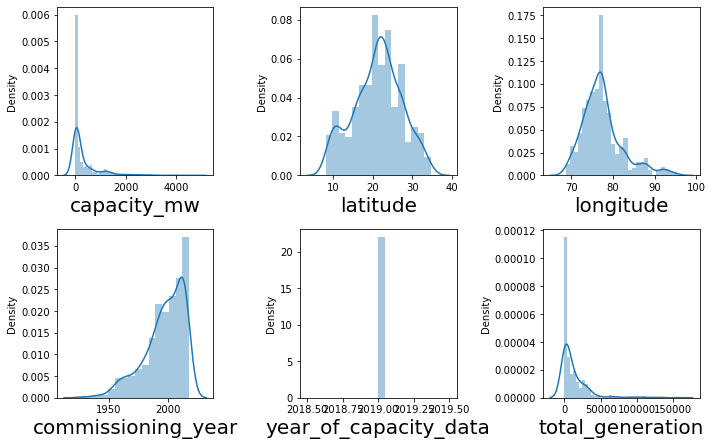

In [18]:
#cheking ditribution of plot
plt.figure(figsize=(10,15),facecolor='w')
plotnumber=1
for column in numerical:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()    

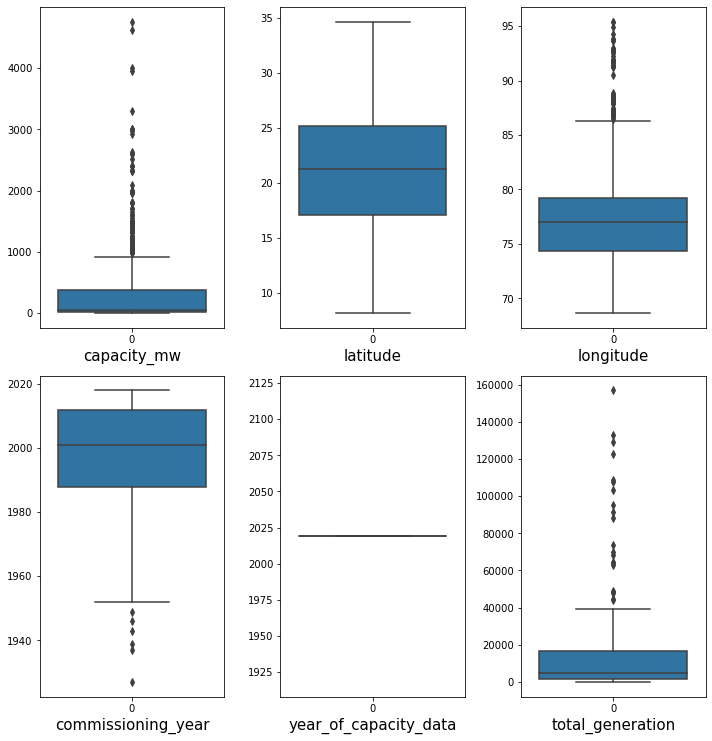

In [19]:
#cheking  for outlier 
plt.figure(figsize=(10,15),facecolor='w')
plotnumber=1
for column in numerical:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)

    plotnumber+=1
plt.tight_layout()    

In [20]:
#1st qantile
q1=data.quantile(0.25)
#3rd quantile
q3=data.quantile(0.75)
iqr=q3-q1

In [21]:
iqr

capacity_mw                368.525000
latitude                     8.104450
longitude                    4.817200
commissioning_year          24.000000
year_of_capacity_data        0.000000
total_generation         15294.108514
dtype: float64

In [22]:
#same for all deleting outlier
Trust_high=(q3['capacity_mw'] +(1.5*iqr['capacity_mw']))
print(Trust_high)
a=np.where(data['capacity_mw']>Trust_high)
data=data.drop(data.index[a])
print(data.shape)

data.reset_index()

938.0374999999999
(794, 11)


,index,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_data_source,total_generation
0,0,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN
1,1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN
2,2,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,WRI,NaN,NaN,NaN
3,3,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,WRI,2019.0,Central Electricity Authority,3637.55432
4,5,250.0,23.7689,68.6447,Coal,2005.0,NaN,Central Electricity Authority,WRI,2019.0,Central Electricity Authority,5662.60600
...,...,...,...,...,...,...,...,...,...,...,...,...
789,901,106.6,13.1156,77.5838,Oil,1993.0,NaN,Central Electricity Authority,WRI,2019.0,Central Electricity Authority,NaN
790,903,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN
791,904,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN
792,905,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,NaN,NaN,NaN


In [23]:
#same for all deleting outlier
longitude_Error_high=(q3['longitude'] +(1.5*iqr['longitude']))
print(longitude_Error_high)
a=np.where(data['longitude']>longitude_Error_high)
data=data.drop(data.index[a])
print(data.shape)

data.reset_index()

86.43189999999997
(743, 11)


,index,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_data_source,total_generation
0,0,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN
1,1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN
2,2,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,WRI,NaN,NaN,NaN
3,5,250.0,23.7689,68.6447,Coal,2005.0,NaN,Central Electricity Authority,WRI,2019.0,Central Electricity Authority,5662.60600
4,6,60.0,10.4547,77.0078,Hydro,1970.0,NaN,Central Electricity Authority,WRI,2019.0,Central Electricity Authority,509.13155
...,...,...,...,...,...,...,...,...,...,...,...,...
738,901,106.6,13.1156,77.5838,Oil,1993.0,NaN,Central Electricity Authority,WRI,2019.0,Central Electricity Authority,NaN
739,903,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN
740,904,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN
741,905,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,NaN,NaN,NaN


In [24]:
#same for all deleting outlier
total_generation_Error_high=(q3['total_generation'] +(1.5*iqr['total_generation']))
print(total_generation_Error_high)
a=np.where(data['total_generation']>total_generation_Error_high)
data=data.drop(data.index[a])
print(data.shape)

data.reset_index()

39617.02778625
(743, 11)


,index,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_data_source,total_generation
0,0,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN
1,1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN
2,2,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,WRI,NaN,NaN,NaN
3,5,250.0,23.7689,68.6447,Coal,2005.0,NaN,Central Electricity Authority,WRI,2019.0,Central Electricity Authority,5662.60600
4,6,60.0,10.4547,77.0078,Hydro,1970.0,NaN,Central Electricity Authority,WRI,2019.0,Central Electricity Authority,509.13155
...,...,...,...,...,...,...,...,...,...,...,...,...
738,901,106.6,13.1156,77.5838,Oil,1993.0,NaN,Central Electricity Authority,WRI,2019.0,Central Electricity Authority,NaN
739,903,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN
740,904,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN
741,905,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,NaN,NaN,NaN


In [25]:
# here we use lower side to delete the outlier
commissioning_year=(q1['commissioning_year'] -(1.5*iqr['commissioning_year']))
print(commissioning_year)
a=np.where(data['commissioning_year']<commissioning_year)
data=data.drop(data.index[a])
print(data.shape)

data.reset_index()

1952.0
(737, 11)


,index,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_data_source,total_generation
0,0,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN
1,1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN
2,2,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,WRI,NaN,NaN,NaN
3,5,250.0,23.7689,68.6447,Coal,2005.0,NaN,Central Electricity Authority,WRI,2019.0,Central Electricity Authority,5662.60600
4,6,60.0,10.4547,77.0078,Hydro,1970.0,NaN,Central Electricity Authority,WRI,2019.0,Central Electricity Authority,509.13155
...,...,...,...,...,...,...,...,...,...,...,...,...
732,901,106.6,13.1156,77.5838,Oil,1993.0,NaN,Central Electricity Authority,WRI,2019.0,Central Electricity Authority,NaN
733,903,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN
734,904,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN
735,905,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,NaN,NaN,NaN


In [26]:
data['primary_fuel'] =data['primary_fuel'].replace ({'Coal':1,'Hydro':2,'Solar':3,'Wind':4,'Gas':5,'Oil':6})

In [27]:
#from sklearn.preprocessing import OrdinalEncoder
#oe=OrdinalEncoder()                                       # here i selected ordinal bcz grades are in order(a to d )
#for i in data.columns:
 #   if data[i].dtypes=='object':
 #       data[i]=oe.fit_transform(data[i].values.reshape(-1,1))
#data

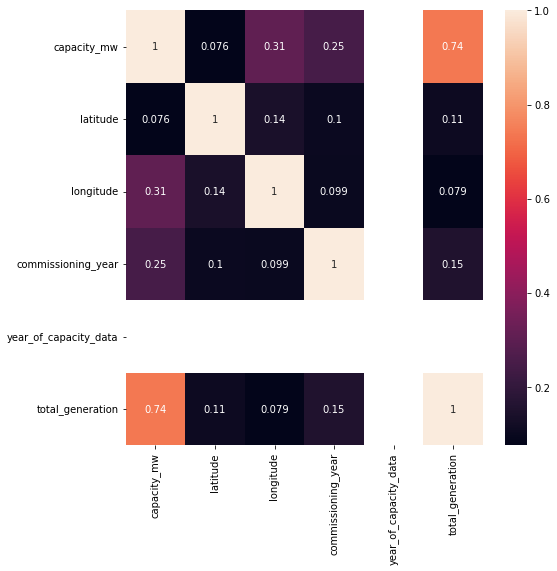

In [28]:
relation=data.corr().abs()  # cheking corelation between fetures vs feature and label
plt.figure(figsize=(8,8))
sns.heatmap(relation,annot=True)
plt.show()

In [29]:
# total generation and capacity mw atre highly related

In [30]:
data.drop(columns=['owner', 'source', 'geolocation_source', 'generation_data_source'],axis=1,inplace=True) # removing wich are not related to label
data

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,year_of_capacity_data,total_generation
0,2.5,28.1839,73.2407,3,2011.0,NaN,NaN
1,98.0,24.7663,74.6090,1,NaN,NaN,NaN
2,39.2,21.9038,69.3732,4,NaN,NaN,NaN
5,250.0,23.7689,68.6447,1,2005.0,2019.0,5662.60600
6,60.0,10.4547,77.0078,2,1970.0,2019.0,509.13155
...,...,...,...,...,...,...,...
901,106.6,13.1156,77.5838,6,1993.0,2019.0,NaN
903,3.0,12.8932,78.1654,3,NaN,NaN,NaN
904,25.5,15.2758,75.5811,4,NaN,NaN,NaN
905,80.0,24.3500,73.7477,1,NaN,NaN,NaN


In [31]:
#categorical= ['primary_fuel', 'owner', 'source', 'geolocation_source', 'generation_data_source']


In [32]:
data.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,year_of_capacity_data,total_generation
0,2.5,28.1839,73.2407,3,2011.0,NaN,NaN
1,98.0,24.7663,74.6090,1,NaN,NaN,NaN
2,39.2,21.9038,69.3732,4,NaN,NaN,NaN
5,250.0,23.7689,68.6447,1,2005.0,2019.0,5662.60600
6,60.0,10.4547,77.0078,2,1970.0,2019.0,509.13155


In [33]:
x=data.drop(columns=['primary_fuel'],axis=1)
y=data['primary_fuel']

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=41)

# model confidance/accuracy

In [35]:
##write one funtion and call as many as time to check accuracy score of different model
def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print('\n========== Train Result========')
        print(f'Accuracy score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
    elif train==False:
    
        pred=clf.predict(x_test)
        
        print('\n========== Test Result========')
        print(f'Accuracy score: {accuracy_score(y_test,pred)*100:.2f}%')

        print('\n\n Test classification Report\n',classification_report(y_test,pred,digits=2))

In [39]:
random_clf=RandomForestClassifier()
random_clf.fit(x_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True) #train
metric_score(clf,x_train,x_test,y_train,y_test, train=False)#test